In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle, Ellipse
import sys
import os
src_path='../src'
if not src_path in sys.path:
    sys.path.insert(1,src_path)
from preposessing import *
from utils_OB import *
from _tracking import *
%load_ext autoreload
import pickle
%autoreload 2
import pandas as pd
from utils_JK import *
from _postprocessing import *
import _generate_time_series
import seaborn as sns
sns.set_theme(context='paper', style = 'ticks', color_codes='deep')
matplotlib.use('module://matplotlib_inline.backend_inline')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
with open('initial_segs_50.pkl', "rb") as file:
    initial_segs= pickle.load(file)
    
with open('suggested_initials_20.pkl', "rb") as file:
    sug_segs_20= pickle.load(file)
    
with open('suggested_split_initials_20.pkl', "rb") as file:
    sug_split_segs_20= pickle.load(file)

with open('suggested_initials_30.pkl', "rb") as file:
    sug_segs_30= pickle.load(file)
    
with open('suggested_split_initials_30.pkl', "rb") as file:
    sug_split_segs_30= pickle.load(file)

with open('suggested_initials_50.pkl', "rb") as file:
    sug_segs_50= pickle.load(file)
    
with open('suggested_split_initials_50.pkl', "rb") as file:
    sug_split_segs_50= pickle.load(file)

with open('suggested_initials_100.pkl', "rb") as file:
    sug_segs_100= pickle.load(file)
    
with open('suggested_split_initials_100.pkl', "rb") as file:
    sug_split_segs_100= pickle.load(file)

In [3]:
# sug_segs_lens=[len(seg) for seg in sug_segs]
# sug_split_segs_lens=[len(seg) for seg in sug_split_segs]
# initial_segs_lens=[len(seg) for seg in initial_segs]


def prep_bars(list):
    counts=[]
    range_x=np.arange(np.min(list),np.max(list)+1)
    for k in range_x:
        # print(np.asanyarray(list)==k)
        c=len(np.where(np.asanyarray(list)==k)[0])
        counts.append(c)
    return range_x,np.asanyarray(counts),np.mean(list)



splits=[sug_split_segs_20,sug_split_segs_30,sug_split_segs_50]#,sug_split_segs_100
non_splits=[sug_segs_20,sug_segs_30,sug_segs_50,]#sug_segs_100


split_bars=[]
for n_run in splits:
   lens=[len(seg) for seg in n_run]
   x,counts,m=prep_bars(lens)
   split_bars.append((x,counts,m))

no_split_bars=[]
for n_run in non_splits:
   lens=[len(seg) for seg in n_run]
   x,counts,m=prep_bars(lens)
   no_split_bars.append((x,counts,m))
print(split_bars)

initial_bars=[]
for n_run in [initial_segs]:
   lens=[len(seg) for seg in n_run]
   x,counts,m=prep_bars(lens)
   initial_bars.append((x,counts,m))
print(split_bars)

[(array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), array([  3,  15,  62, 214, 275, 134,  45,  11,   1,   1]), 24.830486202365307), (array([23, 24, 25, 26, 27, 28, 29, 30]), array([ 10,  52, 189, 189, 165,  92,  46,  18]), 26.31011826544021), (array([24, 25, 26, 27, 28, 29, 30, 31, 32]), array([  5,  27, 100, 170, 116, 150, 141,  47,   5]), 28.160315374507228)]
[(array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), array([  3,  15,  62, 214, 275, 134,  45,  11,   1,   1]), 24.830486202365307), (array([23, 24, 25, 26, 27, 28, 29, 30]), array([ 10,  52, 189, 189, 165,  92,  46,  18]), 26.31011826544021), (array([24, 25, 26, 27, 28, 29, 30, 31, 32]), array([  5,  27, 100, 170, 116, 150, 141,  47,   5]), 28.160315374507228)]


In [1]:
print(sum([  3,  15,  62, 214, 275, 134,  45,  11,   1,   1]))

761


In [2]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(6,2),sharex='all',sharey='all')
for i,test in enumerate(split_bars): 
    ax=axs[i,0]
    ax.bar(test[0],test[1]/sum(test[1])*100,color='tab:red')
    ax.axvline(test[2],linestyle='--',color='black')
    ax.grid()
    ax.set_xlim(18,32)

for i,test in enumerate(no_split_bars): 
    ax=axs[i,1]
    ax.bar(test[0],test[1]/sum(test[1])*100,color='tab:blue')
    ax.set_xlim(20,32)
    ax.grid()
    ax.axvline(test[2],linestyle='--',color='black')

    if not i==2:
        ax.tick_params(axis='x',length=0)
    else: 
        ax.set_xlabel('Traces initiated')
    ax.tick_params(axis='y',length=0)
    # ax.set

for i,test in enumerate(initial_bars*3): 
    ax=axs[i,2]
    ax.bar(test[0],test[1]/sum(test[1])*100,color='tab:green')
    if not i==2:
        ax.tick_params(axis='x',length=0)
    else: 
        ax.set_xlabel('Traces initiated')
    vline=ax.axvline(test[2],linestyle='--',color='black')
    
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    # ax.tick_params(axis='y',length=0)
    ax.grid()
    ax.set_xlim(18,34)

axs[0,0].set_title('With split')
axs[0,1].set_title('Without split')
axs[0,2].set_title('Initial time segment')
axs[2,0].set_xlabel('Traces initiated')



for i in [0,1,2]:
    axs[i,2].set_ylabel('Density \n[%]')

ns=[20,30,50]
for i in [0,1,2]:
    axs[i,0].set_ylabel('n = '+str(ns[i]),rotation=0,labelpad=25)
fig.legend(handles=[vline],labels=['Mean'],loc='upper right')
fig.suptitle('Number of traces initiated by iniital phase',y=1.06)
fig.subplots_adjust(wspace=0,hspace=0)
plt.show()



NameError: name 'plt' is not defined

In [4]:
# print(dir(sug_segs_20[0][0]))


def count_unlike(segs):
    counts=[]
    for initiation in segs: 
        init_freqs=[t.ref_frequency for t in initiation]
        init_shapes=[t.ref_mode_shape for t in initiation]
        count=0
        for i,freq in enumerate(init_freqs[1:]):
            df=rel_diff(freq,init_freqs[i])
            if df < 0.15:
                mac=MAC(init_shapes[i],init_shapes[i+1])
                if 1-mac+df < 0.15:
                    print('1')
                else: 
                    count+=1
            else:
                count+=1
        counts.append(count)

    return counts


c=count_unlike(sug_segs_20)


1


In [5]:
split_bars=[]
for test_n in splits:
    c=count_unlike(test_n)
    rang,counts,m=prep_bars(c)
    split_bars.append((rang,counts,m))

# print(split_bars)

1
1
1
1
1
1
1
1
1
1
1


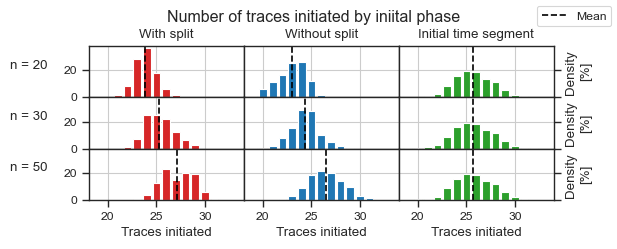

In [6]:
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(6,2),sharex='all',sharey='all')
for i,test in enumerate(split_bars): 
    ax=axs[i,0]
    ax.bar(test[0],test[1]/sum(test[1])*100,color='tab:red')
    ax.axvline(test[2],linestyle='--',color='black')
    ax.grid()
    ax.set_xlim(18,32)

for i,test in enumerate(no_split_bars): 
    ax=axs[i,1]
    ax.bar(test[0],test[1]/sum(test[1])*100,color='tab:blue')
    ax.set_xlim(20,32)
    ax.grid()
    ax.axvline(test[2],linestyle='--',color='black')

    if not i==2:
        ax.tick_params(axis='x',length=0)
    else: 
        ax.set_xlabel('Traces initiated')
    ax.tick_params(axis='y',length=0)
    # ax.set

for i,test in enumerate(initial_bars*3): 
    ax=axs[i,2]
    ax.bar(test[0],test[1]/sum(test[1])*100,color='tab:green')
    if not i==2:
        ax.tick_params(axis='x',length=0)
    else: 
        ax.set_xlabel('Traces initiated')
    vline=ax.axvline(test[2],linestyle='--',color='black')
    
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    # ax.tick_params(axis='y',length=0)
    ax.grid()
    ax.set_xlim(18,34)

axs[0,0].set_title('With split')
axs[0,1].set_title('Without split')
axs[0,2].set_title('Initial time segment')
axs[2,0].set_xlabel('Traces initiated')



for i in [0,1,2]:
    axs[i,2].set_ylabel('Density \n[%]')

ns=[20,30,50]
for i in [0,1,2]:
    axs[i,0].set_ylabel('n = '+str(ns[i]),rotation=0,labelpad=25)
fig.legend(handles=[vline],labels=['Mean'],loc='upper right')
fig.suptitle('Number of traces initiated by iniital phase',y=1.06)
fig.subplots_adjust(wspace=0,hspace=0)
fig.savefig(fname='trace_initiations.png',dpi=400,bbox_inches='tight')
plt.show()


# Frequncy content

In [16]:
trace_comparisons_alg1=PostTraceComparison()
trace_comparisons_alg1.import_Post_traces_from_folder('../../Tracking/Method1_a_n10/')

In [21]:
known_traces=[]
known_phis=[]
tols=[]
for i in range(len(trace_comparisons_alg1.Post_traces)):
    mean_freq=np.mean(trace_comparisons_alg1.Post_traces[i].frequencies)
    known_traces.append(mean_freq)
    known_phis.append(np.median(np.asarray(trace_comparisons_alg1.Post_traces[i].mode_shapes),axis=0))
    tols.append(2*np.std(p_trace.frequencies))
    trace_comparisons_alg1.Post_traces[i].set_dates()

print(len(known_traces))
print(tols)

28
[0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935, 0.0010375524784488935]


In [22]:
all_names=os.listdir('../../5hz_resampled_int_trans_clustered_3/')
start_names=all_names[::5]
start_dates=[]
for file_name in start_names:
    date=file_name[7:17]
    time=file_name[18:23].replace('-',':')
    start_dates.append(date+'T'+time) #YYYY-MM-DD_h-mm
start_dates=np.asarray(start_dates,dtype='datetime64[m]')
print(start_dates[:10])

print(start_dates[0]-start_dates[1])
def create_ref(n):
    known_traces_1=[]
    known_phis_1=[]
    try:
        start_date=start_dates[n]
    except IndexError:
        start_date=start_dates[-1]
        print(start_date)

    for p_trace in trace_comparisons_alg1.Post_traces:
        # print(p_trace.dates[:10])
        
        closest_ix=np.argmin(np.abs(p_trace.dates - start_date))

        try:
            mean_freq=np.mean(p_trace.frequencies[closest_ix:closest_ix+20])
            known_traces_1.append(mean_freq)
            known_phis_1.append(np.median(np.asarray(
                p_trace.mode_shapes[closest_ix:closest_ix+20]),axis=0))
        except IndexError:
            print('except')
            mean_freq=np.mean(p_trace.frequencies)
            known_traces_1.append(mean_freq)
            known_phis_1.append(np.median(np.asarray(
            p_trace.mode_shapes),axis=0)) 
    return known_traces_1,known_phis_1  

['2013-12-05T00:56' '2013-12-06T13:56' '2013-12-06T17:51'
 '2013-12-16T18:43' '2013-12-16T22:01' '2013-12-18T09:12'
 '2013-12-18T17:04' '2013-12-18T19:39' '2013-12-18T22:45'
 '2013-12-19T01:20']
-2220 minutes


In [19]:
# print(len(initial_segs))
# print(len(sug_segs_50))
# print(len(sug_split_segs_50))
def check(f,phi,n):
    diffs=[]
    known_traces,known_phis=create_ref(n)
    for fi,phii in zip(known_traces,known_phis):
        df=rel_diff(f,fi)
        mac=MAC(phi,phii)
        diffs.append(1-mac+df)
    M_ix=np.argmin(diffs)
    diff=diffs[M_ix]
    if diff < 0.15:
        return 2*M_ix+1 # hits mode
    else: 
        if f > known_traces[M_ix]:
            return 2*M_ix + 2      # hits above mode
        else:
            return 2*M_ix          # hits below mode 


# def check(f,phi):
#     f_diffs=[]
#     for fi,phii in zip(known_traces,known_phis):
#         df=rel_diff(f,fi)
#         df=MAC(phi,phii)
#         f_diffs.append(df)

#     M_ix=np.argmin(f_diffs)
#     diff=f_diffs[M_ix]
#     if diff < 0.15:
#         return 2*M_ix+1 # its mode
#     else: 
#         if f > known_traces[M_ix]:
#             return 2*M_ix + 2      # hits above mode
#         else:
#             return 2*M_ix          # hits below mode 
        


f_first=[]
f_split=[]
f_nsplit=[]

f_first_phi=[]
f_split_phi=[]
f_nsplit_phi=[]
n=0
for seg_i in range(len(initial_segs)):
    first=initial_segs[seg_i]
    nsplit=sug_segs_50[seg_i]
    split=sug_split_segs_50[seg_i]

    for trace in first:
        f_first.append((trace.ref_frequency,n))
    for trace in nsplit:
        f_nsplit.append((trace.ref_frequency,n))
    for trace in split:
        f_split.append((trace.ref_frequency,n))

    for trace in first:
        f_first_phi.append((trace.ref_mode_shape,n))
    for trace in nsplit:
        f_nsplit_phi.append((trace.ref_mode_shape,n))
    for trace in split:
        f_split_phi.append((trace.ref_mode_shape,n))
    n+=1

print(len(f_nsplit))
print(len(f_nsplit_phi))

print(len(f_split))
print(len(f_split_phi))

print(len(f_nsplit))
print(len(f_nsplit_phi))

19921
19921
21159
21159
19921
19921


In [24]:
bins_init=np.zeros(28*2+2)


for f,phi in zip(f_first,f_first_phi):
    f_i=f[0]
    n=f[1]
    phi=phi[0]
    bin_ix=check(f_i,phi,n)
    bins_init[bin_ix]+=1
    print(n)

print(bins_init)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [26]:
bins_nsplit=np.zeros(28*2+2)


for f,phi in zip(f_nsplit,f_nsplit_phi):
    f_i=f[0]
    n=f[1]
    phi=phi[0]
    bin_ix=check(f_i,phi,n)
    bins_nsplit[bin_ix]+=1

print(bins_nsplit)

[  0. 972.  22. 146. 479. 210.  81. 780.   0. 751.   7. 752.  44. 626.
  84. 759.  17. 663.  84. 663.  51. 722.   7. 752. 182. 235.  70. 731.
 119. 149. 197. 573.  43. 549. 181. 563. 224. 746.  20. 606. 304. 260.
 510. 751.  26. 665. 207. 675. 144. 560. 168. 640.  34. 735. 217. 164.
   1.   0.]


In [27]:
bins_split=np.zeros(28*2+2)


for f,phi in zip(f_split,f_split_phi):
    f_i=f[0]
    n=f[1]
    phi=phi[0]
    bin_ix=check(f_i,phi,n)
    bins_split[bin_ix]+=1

print(bins_split)

[  0. 751. 126. 689. 125. 641.  32. 751.   0. 751.  20. 751.  42. 625.
 101. 751.  17. 663.  95. 662.  51. 725.   7. 752. 144. 311.  53. 736.
 136. 226. 139. 615.  29. 751.  52. 685. 275. 745.  30. 720. 267. 266.
 625. 740.  52. 664. 226. 676. 163. 552. 185. 650.  41. 731. 129. 407.
  10.   0.]


In [46]:
np.save('bins_init.npy',bins_init)
np.save('bins_nsplit.npy',bins_nsplit)
np.save('bins_split.npy',bins_split)

In [15]:
f=np.load('bins_init.npy')
bins_init=np.load('bins_init.npy')
bins_nsplit=np.load('bins_nsplit.npy')
bins_split=np.load('bins_split.npy')

In [16]:
def plot_updown_hist(ax,bin_count):
    mode_counts=bin_count[1::2]
    inter_counts=bin_count[0::2]

    modes=np.arange(1,30,1)    
    ax.axhline(741,color='black',linestyle='--',linewidth=0.5,label=r'$\pm$'+'100% of starting points')
    ax.bar(modes,mode_counts,align='center',width=0.5,label='Initiations traced by suggested algorithm')

    ax.bar(modes[:]-0.25,-1*inter_counts,align='edge',width=-0.5,color='tab:red',label='Initiations not traced by suggested algorithm')

    ax.grid()
    ax.axhline(0,color='black')
    ax.plot(modes,modes*0,lw=1,color='black',marker='|')

    ax.axhline(-741,color='black',linestyle='--',linewidth=0.5)
    ax.set_ylim(-760,1000)
    ax.set_xlim(0,34)
    ax.set_yticklabels([])


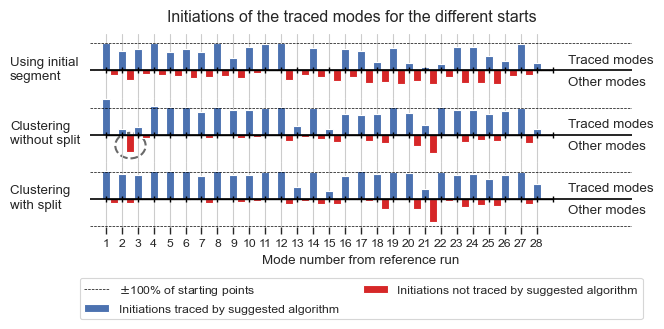

In [44]:
fig,axs=plt.subplots(3,1,figsize=(7,2.5),sharex='col')

plot_updown_hist(axs[0],bins_init)
plot_updown_hist(axs[1],bins_nsplit)
plot_updown_hist(axs[2],bins_split)
titles=['Using initial\nsegment','Clustering\nwithout split', 'Clustering \nwith split']



axs[0].spines[['left','right', 'top','bottom']].set_visible(False)
axs[1].spines[['left','right', 'top','bottom']].set_visible(False)

axs[0].tick_params(length=0)
axs[1].tick_params(length=0)
axs[-1].tick_params(axis='y',length=0)
axs[-1].spines[['left','right', 'top','bottom']].set_visible(False)
axs[-1].set_xlabel('Mode number from reference run')
axs[-1].set_xticks(np.arange(1,29))
for i,ax in enumerate(fig.axes):
    ax.text(-5,-240,titles[i],)
    # ax.set_axis_off()
    ax.text(30,200,'Traced modes')
    ax.text(30,-400,'Other modes')
    ax.grid(axis='y',visible=False)
# axs[-1].set_axes_on()
fig.subplots_adjust(hspace=0.0,wspace=0)
fig.suptitle('Initiations of the traced modes for the different starts')
# axs[-1].get_
axs[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.7),
          ncol=2)

c=Ellipse((2.55,-300),width=1.9,height=700,angle=0,color='dimgrey',ls='--',fill=False,zorder=-1,lw=1.5)
c2=Ellipse((21.6,-300),width=1.9,height=700,angle=0,color='peru',ls='--',lw=1.5,fill=False,zorder=-1)
c3=Ellipse((21.6,-300),width=1.9,height=700,angle=0,color='peru',ls='--',lw=1.5,fill=False,zorder=-1)
c4=Ellipse((21.6,-300),width=1.9,height=700,angle=0,color='peru',ls='--',lw=1.5,fill=False,zorder=-1)


axs[1].add_patch(c)
# axs[1].add_patch(c2)
# axs[2].add_patch(c3)
# axs[0].add_patch(c4)
fig.savefig(fname='mode_content_startingpoints_marked.png',dpi=500,bbox_inches='tight')
plt.show()



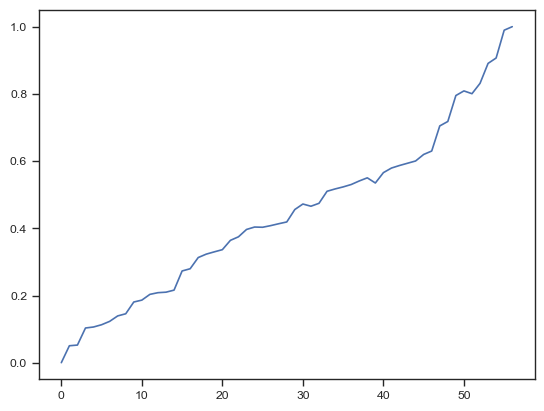

In [26]:
bin_seps=[0]
i=0
for f,tol in zip(known_traces,tols):
    
    # if f-tol > bin_seps[i-1]:
    bin_seps.append(f-tol)
    # else:
    #     avg= (f-tol + bin_seps[i-1])/2
    #     bin_seps[i-1]=avg
    #     bin_seps.append(avg)
    bin_seps.append(f+tol)
    i+=1
plt.plot(bin_seps)

# -------------------------------------------------

In [37]:
r_split,h_split=prep_bars(sug_split_segs_lens)
r_sug,h_sug=prep_bars(sug_segs_lens)
r_in,h_in=prep_bars(initial_segs_lens)
# r_fav,h_fav=prep_bars(fav)


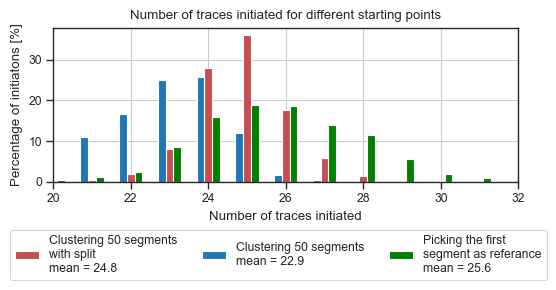

In [38]:
fig,ax=plt.subplots(1,1,figsize=(6,2))

sp=ax.bar(r_split,h_split/sum(h_split)*100,width=0.2,color='r')
nsp=ax.bar(r_sug-0.2,h_sug/sum(h_split)*100,width=0.2,color='tab:blue')
first=ax.bar(r_in+0.2,h_in/sum(h_in)*100,width=0.2,color='green')
# ax.bar(r_fav+0.2,h_fav/sum(h_in)*100,width=0.2,label='Favarelli',color='black')

handles=[sp,nsp,first]
labels=['Clustering 50 segments\nwith split\nmean = '+f'{str(np.mean(sug_split_segs_lens)):.4}',
        'Clustering 50 segments\nmean = '+f'{str(np.mean(sug_segs_lens)):.4}',
        'Picking the first\nsegment as referance\nmean = '+f'{str(np.mean(initial_segs_lens)):.4}'
        ]


fig.legend(handles=handles,labels=labels,ncols=4,loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True,  ncol=4,markerscale=6)




ax.set_ylabel('Percentage of initiatons [%]')
ax.set_xlabel('Number of traces initiated')
ax.set_xlim(20,32)
# ax.legend(loc='upper left')
ax.set_title('Number of traces initiated for different starting points')
# ax.set_xticks(range(18,30))
ax.grid()
fig.savefig('initial_clustering_effects_n20.png',dpi=400,bbox_inches='tight')